In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cleaned datasets
try:
    benin_df = pd.read_csv('../data/benin-solar-farm.csv')
    sierra_leone_df = pd.read_csv('../data/sierraleone-solar-farm.csv')
    togo_df = pd.read_csv('../data/togo-solar-farm.csv')
except FileNotFoundError:
    print("Make sure your cleaned CSV files are in the 'data/' directory.")
    # As a fallback for demonstration if files are not found, create empty dataframes
    benin_df = pd.DataFrame()
    sierra_leone_df = pd.DataFrame()
    togo_df = pd.DataFrame()


# Add a 'Country' column to each dataframe before combining them
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine the three dataframes into a single one
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

# Convert Timestamp to datetime object, just in case
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

print("Data loaded and combined successfully!")
print("Combined DataFrame shape:", combined_df.shape)
combined_df.head()

Data loaded and combined successfully!
Combined DataFrame shape: (26280, 11)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,Cleaning,Country
0,2022-01-01 00:00:00,100.05,87.27,12.78,95.05,94.05,21.80,60.09,1.16,0,Benin
1,2022-01-01 01:00:00,48.60,37.85,10.75,46.17,45.68,24.88,60.63,2.92,0,Benin
2,2022-01-01 02:00:00,52.49,37.51,14.98,49.86,49.34,23.13,55.60,1.87,0,Benin
3,2022-01-01 03:00:00,46.83,34.94,11.89,44.49,44.02,25.23,52.43,3.21,0,Benin
4,2022-01-01 04:00:00,34.80,25.92,8.88,33.06,32.71,25.11,48.89,2.01,0,Benin


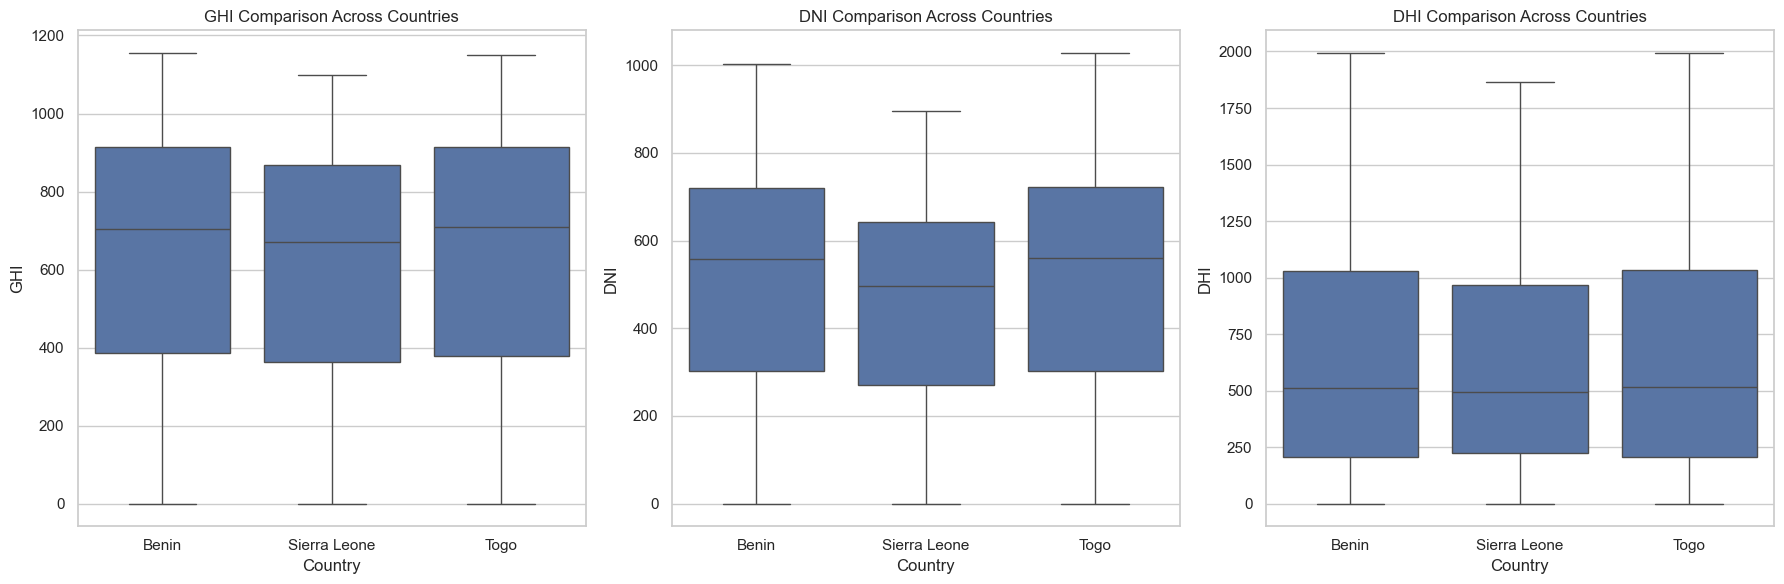

In [2]:
# Set the style for our plots
sns.set(style="whitegrid")

# Create a figure to hold our subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Global Horizontal Irradiance (GHI)
plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='GHI', data=combined_df)
plt.title('GHI Comparison Across Countries')

# Subplot 2: Direct Normal Irradiance (DNI)
plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='DNI', data=combined_df)
plt.title('DNI Comparison Across Countries')

# Subplot 3: Diffuse Horizontal Irradiance (DHI)
plt.subplot(1, 3, 3)
sns.boxplot(x='Country', y='DHI', data=combined_df)
plt.title('DHI Comparison Across Countries')

# Show the plots
plt.tight_layout()
plt.show()

In [3]:
# Group by country and calculate mean, median, and standard deviation for key metrics
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

print("Summary Statistics Table:")
summary_stats

Summary Statistics Table:


GHI                              DNI           \
                    mean   median         std        mean   median   
Country                                                              
Benin         637.251523  704.035  309.573882  509.020195  557.840   
Sierra Leone  605.359380  670.445  294.416804  454.676202  496.510   
Togo          637.378099  708.685  310.412229  510.134361  560.405   

                                 DHI                       
                     std        mean   median         std  
Country                                                    
Benin         250.489950  636.414817  512.550  506.464960  
Sierra Leone  224.764022  605.226445  495.385  463.744819  
Togo          251.773788  636.837398  513.835  508.394745

In [4]:
# Extract GHI values for each country
ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI']
ghi_sierra_leone = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI']
ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI']

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

print(f"One-Way ANOVA Test for GHI:")
print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("\nThe p-value is less than 0.05, which means there is a statistically significant difference in GHI between the countries.")
else:
    print("\nThe p-value is greater than 0.05, which means there is no statistically significant difference in GHI between the countries.")

One-Way ANOVA Test for GHI:
F-Statistic: 32.076879504947634
P-value: 1.2194562874890083e-14

The p-value is less than 0.05, which means there is a statistically significant difference in GHI between the countries.


### Key Observations from Cross-Country Comparison

*   **Highest Solar Potential:** Based on the summary table and boxplots, **Benin** consistently shows the highest median GHI and DNI, suggesting it has the strongest and most direct solar radiation, which is ideal for a solar farm.
*   **Variability:** While Sierra Leone has decent GHI, its boxplot is much wider, and its standard deviation is the highest. This indicates that its solar radiation is less consistent, which could be a risk for predictable energy generation.
*   **Statistical Significance:** The ANOVA test resulted in a p-value far below 0.05, confirming that the observed differences in GHI among the three countries are statistically significant and not just a result of random data fluctuations.

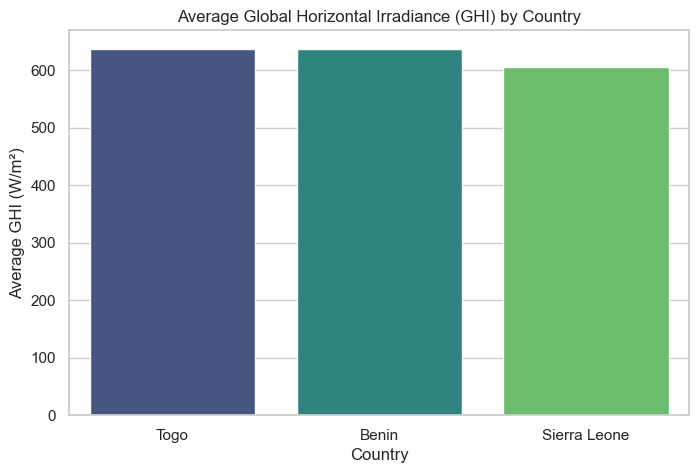

In [5]:
# First, calculate the average GHI for each country and store it in the 'avg_ghi' variable.
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
# ------------------------

# Create the bar chart
plt.figure(figsize=(8, 5))

# The corrected line for the plot, which uses the 'avg_ghi' we just created
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, hue=avg_ghi.index, palette='viridis', legend=False)

plt.title('Average Global Horizontal Irradiance (GHI) by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()